In [1]:
import numpy as np 
import pandas as pd 
from glob import glob
from tqdm.autonotebook import tqdm


C:\Users\tunne\anaconda3\envs\YOLO\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tunne\anaconda3\envs\YOLO\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\tunne\anaconda3\envs\YOLO\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\tunne\AppData\Local\Temp\ipykernel_59772\1934973324.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import time
from time import sleep

In [3]:
import os

In [4]:
print(os.listdir("../../20k_audio_splitted_images_dataset"))

['test', 'train', 'val']


In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader


In [6]:
data_dir='../../20k_audio_splitted_images_dataset/train'

In [7]:
TRAIN_DIR = '../../20k_audio_splitted_images_dataset/train'
VAL_DIR = '../../20k_audio_splitted_images_dataset/val'
TEST_DIR = '../../20k_audio_splitted_images_dataset/test'

In [8]:
img_classes_count = []
classes = []
print("Class".ljust(24," "), "Count")
print("".center(30,"-"))
for folder in os.listdir(os.path.join(data_dir)):
    print()
    class_img_count  = len(os.listdir(os.path.join(data_dir, folder)))
    img_classes_count.append(class_img_count)
    classes.append(folder)
    print(f"{folder}".ljust(24," "), f"{class_img_count}")



Class                    Count
------------------------------

Queen                    7000

Queenless                7000


In [9]:
images = glob(os.path.join(data_dir, '*/*.jpg'))
img_num = len(images)
print("Total images: ", img_num)

Total images:  0


In [10]:
data_transforms ={
    "train_transforms": transforms.Compose([transforms.Resize(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406], 
                                                                [0.229, 0.224, 0.225])]),
   "valid_transforms": transforms.Compose([transforms.Resize(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                                [0.229, 0.224, 0.225])]), 
    "test_transforms": transforms.Compose([transforms.Resize(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                                [0.229, 0.224, 0.225])])
}

In [11]:
train_loader = DataLoader(
    datasets.ImageFolder(TRAIN_DIR, transform=data_transforms["train_transforms"]),
    batch_size = 2,
    shuffle = True,
    num_workers = 0
)
test_loader = DataLoader(
    datasets.ImageFolder(TEST_DIR, transform=data_transforms["test_transforms"]),
    batch_size = 8,
    shuffle = False,
    num_workers = 0
)
val_loader = DataLoader(
    datasets.ImageFolder(VAL_DIR, transform=data_transforms["valid_transforms"]),
    batch_size = 2,
    shuffle = False,
    num_workers = 0
)

In [12]:
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

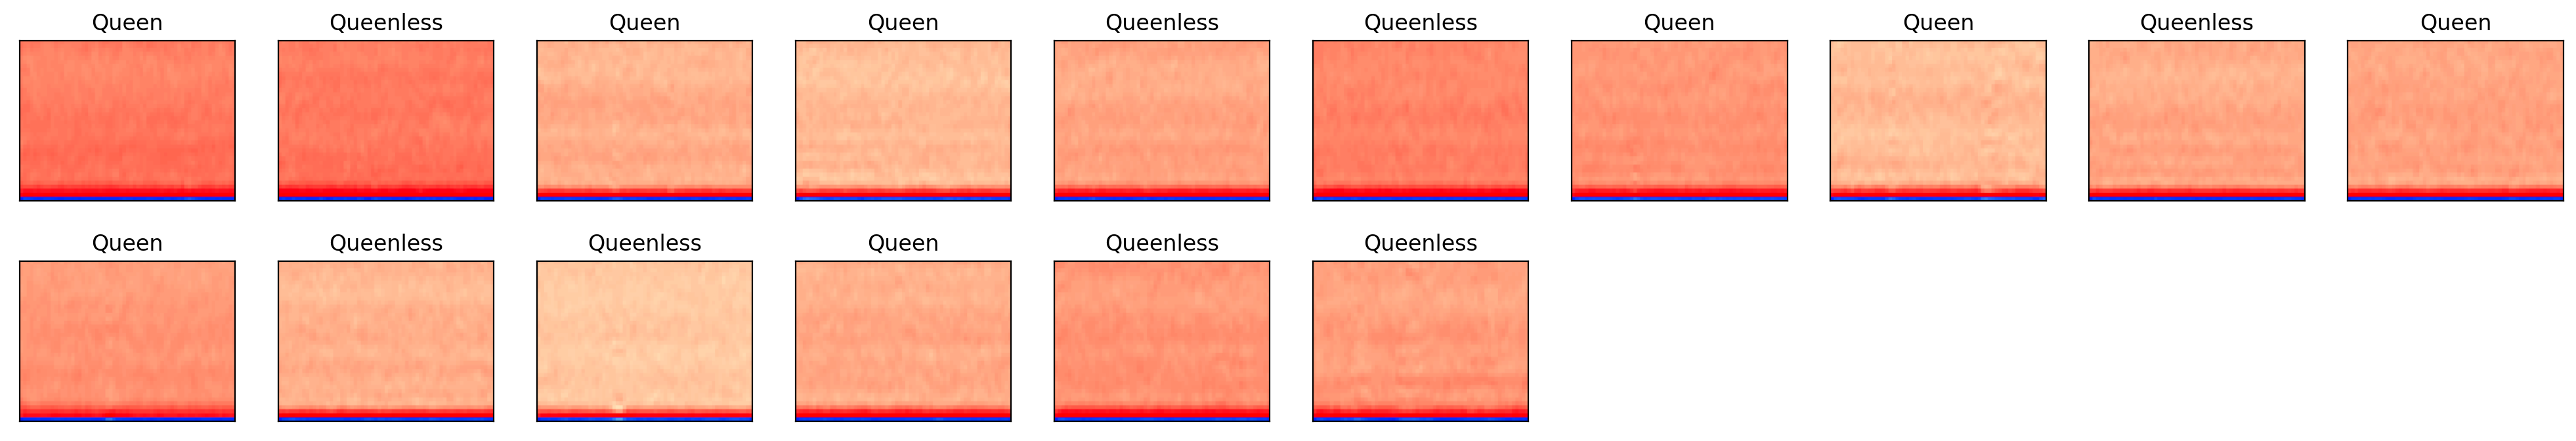

In [13]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() 

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [13]:
model_transfer = models.googlenet(pretrained=True)

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()

C:\Users\tunne\anaconda3\envs\YOLO\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\tunne\anaconda3\envs\YOLO\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
print(model_transfer)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [15]:
print(model_transfer.fc.in_features)
print(model_transfer.fc.out_features)

1024
1000


In [16]:
for param in model_transfer.parameters():
    param.requires_grad=True

In [17]:
n_inputs = model_transfer.fc.in_features

model_transfer.fc = nn.Linear(n_inputs, len(classes))

if use_cuda:
    model_transfer = model_transfer.cuda()

print(model_transfer.fc.out_features)


2


In [21]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001, momentum=0.9)

In [19]:
train_loss_log = []
val_loss_log = []
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    begin_time = time.time()
    valid_loss_min = np.inf
    
    for epoch in range(1, n_epochs+1):
        epoch_start_time = time.time()
        train_loss = 0.0
        valid_loss = 0.0
            
        model.train()
        for batch_idx, (data, target) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch}: ")):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1/(batch_idx + 1))*(loss.data-train_loss))
            
        model.eval()
        for batch_idx, (data, target) in enumerate(tqdm(val_loader, desc=f"Validating epoch {epoch}: ")):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1/(batch_idx + 1))*(loss.data - valid_loss))
        print('Epoch: {} \tTraining Loss: {:.5f} \tValidation Loss: {:.5f}'.format(epoch, train_loss, valid_loss))
        train_loss_log.append(loss)
        val_loss_log.append(valid_loss)
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.5f} --> {:.5f}). Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_transfer.pt')
            valid_loss_min = valid_loss
        end_time = time.time()
        print(f"Epoch {epoch} took {end_time - epoch_start_time} seconds.")
        if epoch == n_epochs:
            print(f"Total training time: {end_time-begin_time} seconds")
    return model, train_loss_log, val_loss_log

            

In [26]:
torch.cuda.empty_cache()

In [21]:
loaders_transfer = {'train': train_loader,
                    'valid': val_loader,
                    'test': test_loader}
model_transfer, train_loss, val_loss = train(60, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch 1:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 0.59227 	Validation Loss: 0.47412
Validation loss decreased (inf --> 0.47412). Saving model ...
Epoch 1 took 518.1482245922089 seconds.


Epoch 2:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 2 	Training Loss: 0.43852 	Validation Loss: 0.43068
Validation loss decreased (0.47412 --> 0.43068). Saving model ...
Epoch 2 took 514.305319070816 seconds.


Epoch 3:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 3 	Training Loss: 0.38212 	Validation Loss: 0.42008
Validation loss decreased (0.43068 --> 0.42008). Saving model ...
Epoch 3 took 513.3655784130096 seconds.


Epoch 4:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 4 	Training Loss: 0.34197 	Validation Loss: 0.48383
Epoch 4 took 519.5361585617065 seconds.


Epoch 5:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 5 	Training Loss: 0.30482 	Validation Loss: 0.53258
Epoch 5 took 518.2158694267273 seconds.


Epoch 6:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 6 	Training Loss: 0.27559 	Validation Loss: 0.47574
Epoch 6 took 513.1951439380646 seconds.


Epoch 7:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 7 	Training Loss: 0.24862 	Validation Loss: 0.52103
Epoch 7 took 513.8568077087402 seconds.


Epoch 8:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 8 	Training Loss: 0.21659 	Validation Loss: 0.56852
Epoch 8 took 514.7866616249084 seconds.


Epoch 9:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 9 	Training Loss: 0.18909 	Validation Loss: 0.63972
Epoch 9 took 514.5921232700348 seconds.


Epoch 10:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 10 	Training Loss: 0.17162 	Validation Loss: 0.48535
Epoch 10 took 516.2630364894867 seconds.


Epoch 11:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 11 	Training Loss: 0.14197 	Validation Loss: 0.84207
Epoch 11 took 508.18698501586914 seconds.


Epoch 12:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 12 	Training Loss: 0.12240 	Validation Loss: 0.66753
Epoch 12 took 514.0424203872681 seconds.


Epoch 13:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 13 	Training Loss: 0.10461 	Validation Loss: 0.75150
Epoch 13 took 508.3957288265228 seconds.


Epoch 14:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 14:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 14 	Training Loss: 0.09187 	Validation Loss: 0.68074
Epoch 14 took 508.821946144104 seconds.


Epoch 15:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 15:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 15 	Training Loss: 0.07530 	Validation Loss: 0.69357
Epoch 15 took 510.15656566619873 seconds.


Epoch 16:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 16:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 16 	Training Loss: 0.07793 	Validation Loss: 1.00126
Epoch 16 took 545.76438164711 seconds.


Epoch 17:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 17:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 17 	Training Loss: 0.05137 	Validation Loss: 0.55642
Epoch 17 took 540.3589723110199 seconds.


Epoch 18:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 18:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 18 	Training Loss: 0.05273 	Validation Loss: 0.56264
Epoch 18 took 512.5916152000427 seconds.


Epoch 19:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 19:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 19 	Training Loss: 0.04348 	Validation Loss: 0.66228
Epoch 19 took 518.8653783798218 seconds.


Epoch 20:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 20:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 20 	Training Loss: 0.04078 	Validation Loss: 0.59881
Epoch 20 took 509.6251883506775 seconds.


Epoch 21:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 21:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 21 	Training Loss: 0.02977 	Validation Loss: 0.67383
Epoch 21 took 514.5805339813232 seconds.


Epoch 22:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 22:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 22 	Training Loss: 0.03083 	Validation Loss: 0.61645
Epoch 22 took 514.5882253646851 seconds.


Epoch 23:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 23:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 23 	Training Loss: 0.03011 	Validation Loss: 0.59698
Epoch 23 took 511.85181975364685 seconds.


Epoch 24:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 24:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 24 	Training Loss: 0.01960 	Validation Loss: 0.76285
Epoch 24 took 514.2478051185608 seconds.


Epoch 25:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 25:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 25 	Training Loss: 0.02537 	Validation Loss: 0.80913
Epoch 25 took 518.5402116775513 seconds.


Epoch 26:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 26:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 26 	Training Loss: 0.01429 	Validation Loss: 0.72141
Epoch 26 took 522.8694076538086 seconds.


Epoch 27:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 27:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 27 	Training Loss: 0.01989 	Validation Loss: 0.82305
Epoch 27 took 518.2315015792847 seconds.


Epoch 28:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 28:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 28 	Training Loss: 0.02450 	Validation Loss: 0.67350
Epoch 28 took 517.9247937202454 seconds.


Epoch 29:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 29:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 29 	Training Loss: 0.01637 	Validation Loss: 0.74369
Epoch 29 took 519.0830101966858 seconds.


Epoch 30:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 30:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 30 	Training Loss: 0.02170 	Validation Loss: 0.68014
Epoch 30 took 516.7223012447357 seconds.


Epoch 31:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 31:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 31 	Training Loss: 0.00954 	Validation Loss: 0.61051
Epoch 31 took 516.5595605373383 seconds.


Epoch 32:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 32:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 32 	Training Loss: 0.01051 	Validation Loss: 0.70825
Epoch 32 took 523.0928862094879 seconds.


Epoch 33:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 33:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 33 	Training Loss: 0.00583 	Validation Loss: 0.69057
Epoch 33 took 519.7360763549805 seconds.


Epoch 34:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 34:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 34 	Training Loss: 0.00224 	Validation Loss: 0.67659
Epoch 34 took 517.6545782089233 seconds.


Epoch 35:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 35:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 35 	Training Loss: 0.01154 	Validation Loss: 1.07801
Epoch 35 took 517.4268424510956 seconds.


Epoch 36:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 36:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 36 	Training Loss: 0.01221 	Validation Loss: 0.74805
Epoch 36 took 517.603502035141 seconds.


Epoch 37:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 37:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 37 	Training Loss: 0.01234 	Validation Loss: 0.77551
Epoch 37 took 515.3812508583069 seconds.


Epoch 38:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 38:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 38 	Training Loss: 0.01730 	Validation Loss: 0.77352
Epoch 38 took 518.1520686149597 seconds.


Epoch 39:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 39:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 39 	Training Loss: 0.01131 	Validation Loss: 0.72333
Epoch 39 took 525.9607999324799 seconds.


Epoch 40:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 40:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 40 	Training Loss: 0.01207 	Validation Loss: 0.79396
Epoch 40 took 522.4838716983795 seconds.


Epoch 41:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 41:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 41 	Training Loss: 0.00822 	Validation Loss: 0.67415
Epoch 41 took 538.0909793376923 seconds.


Epoch 42:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 42:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 42 	Training Loss: 0.00326 	Validation Loss: 0.82691
Epoch 42 took 570.8639872074127 seconds.


Epoch 43:   0%|          | 0/7000 [00:00<?, ?it/s]

Validating epoch 43:   0%|          | 0/1000 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 6.00 GiB total capacity; 5.32 GiB already allocated; 0 bytes free; 5.33 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

Text(0.5, 1.0, 'Training loss')

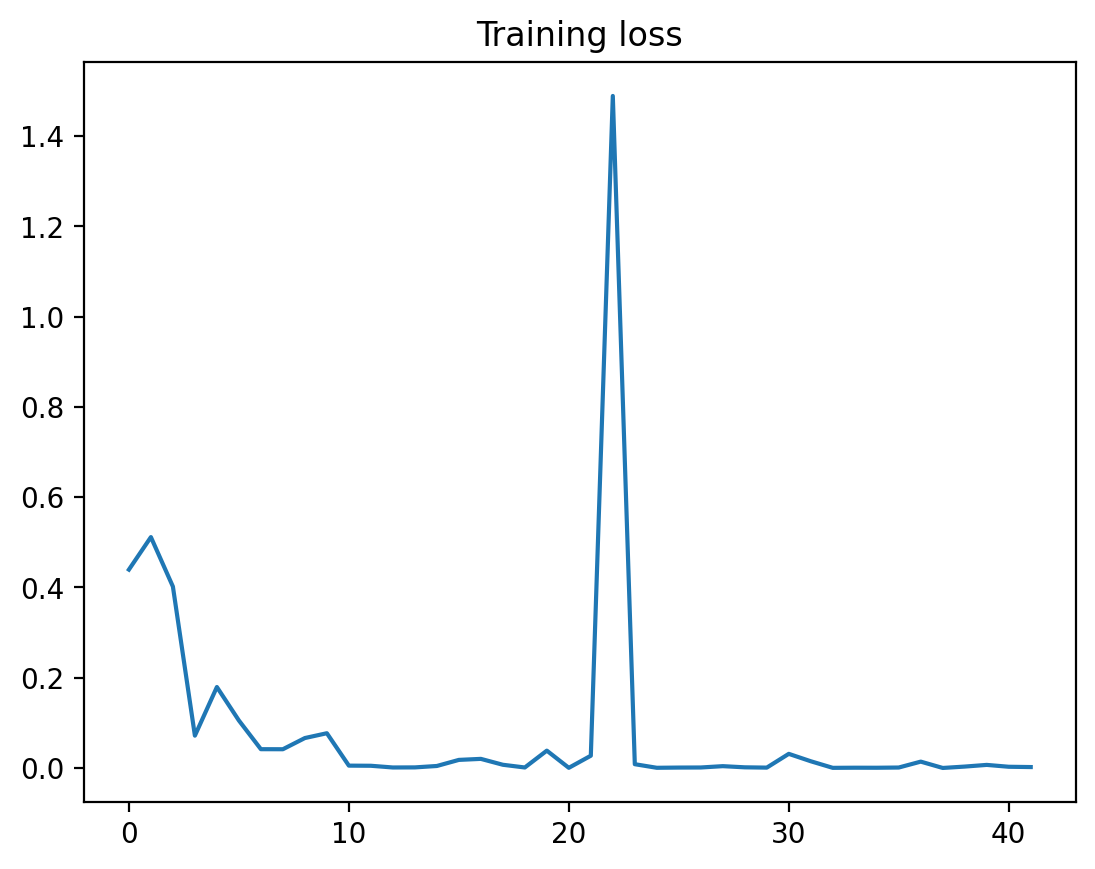

In [23]:
plt.plot([loss.tolist() for loss in train_loss_log])
plt.title("Training loss")

Text(0.5, 1.0, 'Validation Loss')

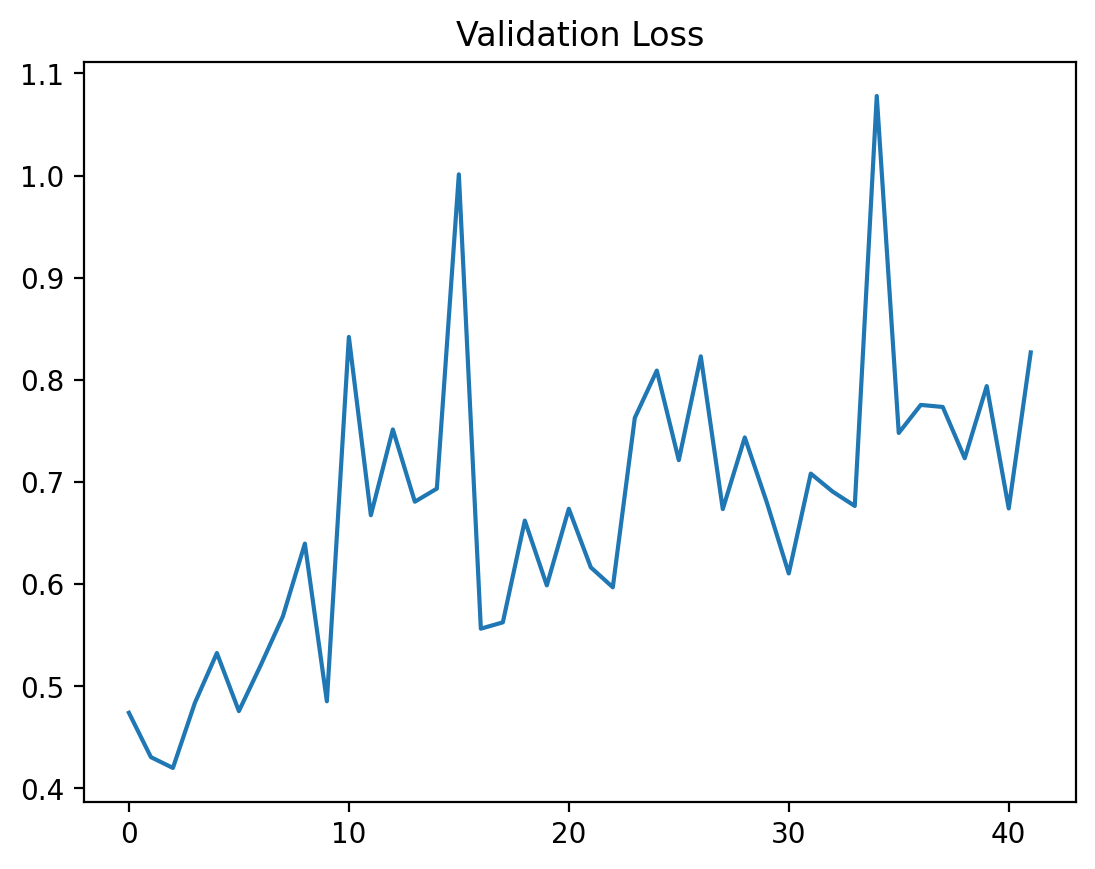

In [24]:
plt.plot([loss.tolist() for loss in val_loss_log])
plt.title("Validation Loss")

In [ ]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

In [18]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

In [19]:
def test(loaders, model, criterion, use_cuda):
    test_loss = 0.0
    correct = 0.
    total = 0.
    
    model.eval()
    
    for batch_idx, (data, target) in enumerate(loaders['test']):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        loss = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        pred = output.data.max(1, keepdim = True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %.2f%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
        
    

In [22]:
loaders_transfer = {'train': train_loader,
                    'valid': val_loader,
                    'test': test_loader}
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.426735


Test Accuracy: 79.62% (3185/4000)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


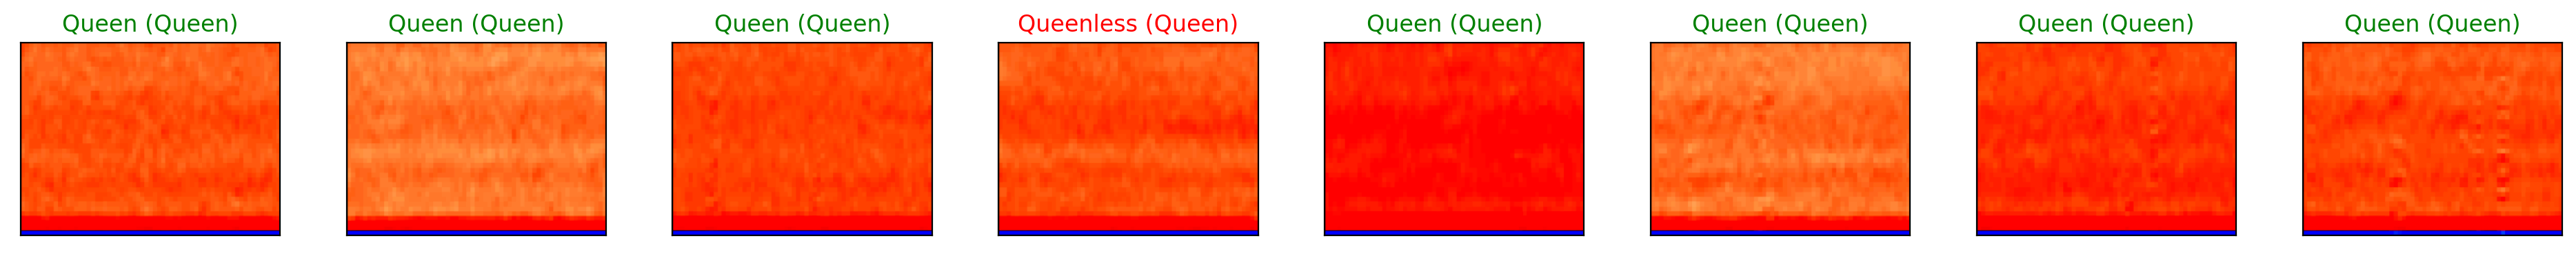

In [23]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images.numpy

if use_cuda:
    images = images.cuda()
    
output = model_transfer(images)

_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds, tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

fig = plt.figure(figsize=(30, 4))
for idx in np.arange(8):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images.cpu()[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]), color=("green" if preds[idx]==labels[idx].item() else "red"))

In [ ]:
output

In [24]:
num_classes = len(classes)
print(num_classes)

def confusion_matrix(dataloaders, model, num_classes):
    confusion_matrix = torch.zeros(num_classes, num_classes)
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(dataloaders['test']):
            if use_cuda:
                inputs = inputs.cuda()
                classes = classes.cuda()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
    print(confusion_matrix)     
    return confusion_matrix
        

2


In [25]:
cf_mat = confusion_matrix(loaders_transfer, model_transfer, num_classes)

tensor([[1648.,  352.],
        [ 463., 1537.]])


In [26]:
import seaborn as sns

<AxesSubplot: >

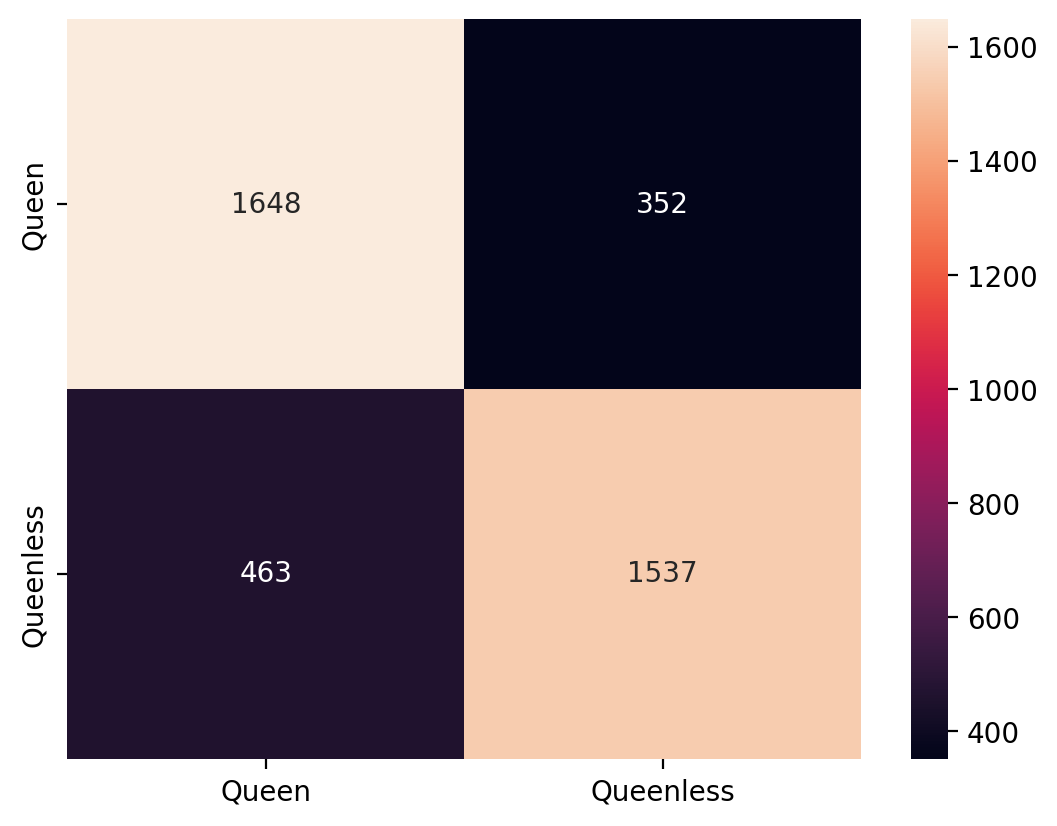

In [27]:
sns.heatmap(pd.DataFrame(cf_mat.numpy(), index=classes, columns=classes), annot=True, fmt="g")

In [28]:
cf_mat.diag()

tensor([1648., 1537.])

In [29]:
def per_class_acc(confusion_matrix, classes):
    cls_acc = confusion_matrix.diag()/confusion_matrix.sum(1)
    for idx, cl in enumerate(cls_acc):
        print("{} : {:.2f}".format(classes[idx], cl))

In [30]:
per_class_acc(cf_mat, classes)

Queen : 0.82
Queenless : 0.77
